<a href="https://colab.research.google.com/github/chika1605/-/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries and Download NLTK Resources

In [37]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

2. Load Raw Text (Example from Habr Article or Any Source)nd split them into individual sentences for further processing.

In [38]:
text = """
Kyrgyzstan is a mountainous country known for its breathtaking natural landscapes and untouched wilderness.
More than ninety percent of its territory is covered by towering mountain ranges, most notably the Tien Shan,
which stretches across much of the nation. The snow-capped peaks, many of which rise above seven thousand meters,
create dramatic scenery throughout the year.

The country is home to hundreds of crystal-clear alpine lakes, the most famous being Issyk-Kul, one of the
largest and deepest lakes in the world. Surrounded by mountains, Issyk-Kul remains ice-free even in winter,
earning it the name "the warm lake." Its turquoise waters and sandy shores attract travelers from around the globe.

Kyrgyzstan’s valleys and highland pastures, known locally as jailoos, are rich with vibrant wildflowers,
aromatic herbs, and diverse wildlife. Nomadic traditions remain strong in these regions, where shepherds continue
to raise horses, sheep, and yaks in harmony with the environment. During the summer months, families move to
the mountain pastures and live in traditional yurts.

The country also boasts a remarkable variety of ecosystems, from arid deserts and red sandstone canyons to
dense forests and lush river valleys. The walnut-fruit forests of Arslanbob, for example, are considered some of
the largest natural walnut forests on Earth. These forests provide habitat for numerous rare plant and animal species.

Kyrgyzstan’s pristine rivers and fast-flowing streams offer ideal conditions for rafting and fishing, while
its protected national parks preserve endangered species such as the snow leopard, ibex, and Marco Polo sheep.
Because of its remarkable biodiversity and unspoiled landscapes, Kyrgyzstan is often described as a paradise
for nature lovers, adventurers, and ecotourists.

Overall, the natural beauty of Kyrgyzstan reflects a unique blend of mountains, lakes, forests, and nomadic
heritage, making it one of the most picturesque and ecologically significant regions in Central Asia.
"""


sentences = text.split(".")
df = pd.DataFrame(sentences, columns=["text"])
df = df[df["text"].str.strip() != ""]
df.head()

,text
0,\nKyrgyzstan is a mountainous country known fo...
1,\nMore than ninety percent of its territory is...
2,"The snow-capped peaks, many of which rise abo..."
3,\n\nThe country is home to hundreds of crystal...
4,"Surrounded by mountains, Issyk-Kul remains ic..."


3. Text Cleaning & Preprocessing

          Includes:

            ✔ Lowercase
            ✔ Removing punctuation
            ✔ Removing numbers
            ✔ Tokenization
            ✔ Stopword removal
            ✔ Lemmatization

In [39]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    return tokens

4. Apply Preprocessing to the Dataset

In [40]:
df["clean_tokens"] = df["text"].apply(clean_text)
df

,text,clean_tokens
0,\nKyrgyzstan is a mountainous country known fo...,"[kyrgyzstan, mountainous, country, known, brea..."
1,\nMore than ninety percent of its territory is...,"[ninety, percent, territory, covered, towering..."
2,"The snow-capped peaks, many of which rise abo...","[snowcapped, peak, many, rise, seven, thousand..."
3,\n\nThe country is home to hundreds of crystal...,"[country, home, hundred, crystalclear, alpine,..."
4,"Surrounded by mountains, Issyk-Kul remains ic...","[surrounded, mountain, issykkul, remains, icef..."
5,""" Its turquoise waters and sandy shores attrac...","[turquoise, water, sandy, shore, attract, trav..."
6,\n\nKyrgyzstan’s valleys and highland pastures...,"[kyrgyzstan, valley, highland, pasture, known,..."
7,Nomadic traditions remain strong in these reg...,"[nomadic, tradition, remain, strong, region, s..."
8,"During the summer months, families move to \n...","[summer, month, family, move, mountain, pastur..."
9,\n\nThe country also boasts a remarkable varie...,"[country, also, boast, remarkable, variety, ec..."


5. Function to Generate N-grams (1, 2, 3)

In [41]:
def get_ngrams(tokens_list, n):
    ngrams = []
    for tokens in tokens_list:
        for i in range(len(tokens)-n+1):
            ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

6. Extract Unigrams, Bigrams and Trigrams

In [42]:
unigrams = get_ngrams(df["clean_tokens"], 1)
bigrams  = get_ngrams(df["clean_tokens"], 2)
trigrams = get_ngrams(df["clean_tokens"], 3)

print("Top Unigrams:", Counter(unigrams).most_common(10))
print("Top Bigrams:", Counter(bigrams).most_common(10))
print("Top Trigrams:", Counter(trigrams).most_common(10))

Top Unigrams: [(('kyrgyzstan',), 5), (('forest',), 5), (('mountain',), 4), (('lake',), 4), (('country',), 3), (('natural',), 3), (('known',), 2), (('landscape',), 2), (('issykkul',), 2), (('one',), 2)]
Top Bigrams: [(('kyrgyzstan', 'mountainous'), 1), (('mountainous', 'country'), 1), (('country', 'known'), 1), (('known', 'breathtaking'), 1), (('breathtaking', 'natural'), 1), (('natural', 'landscape'), 1), (('landscape', 'untouched'), 1), (('untouched', 'wilderness'), 1), (('ninety', 'percent'), 1), (('percent', 'territory'), 1)]
Top Trigrams: [(('kyrgyzstan', 'mountainous', 'country'), 1), (('mountainous', 'country', 'known'), 1), (('country', 'known', 'breathtaking'), 1), (('known', 'breathtaking', 'natural'), 1), (('breathtaking', 'natural', 'landscape'), 1), (('natural', 'landscape', 'untouched'), 1), (('landscape', 'untouched', 'wilderness'), 1), (('ninety', 'percent', 'territory'), 1), (('percent', 'territory', 'covered'), 1), (('territory', 'covered', 'towering'), 1)]


7. Visualization — Top 10 Unigrams

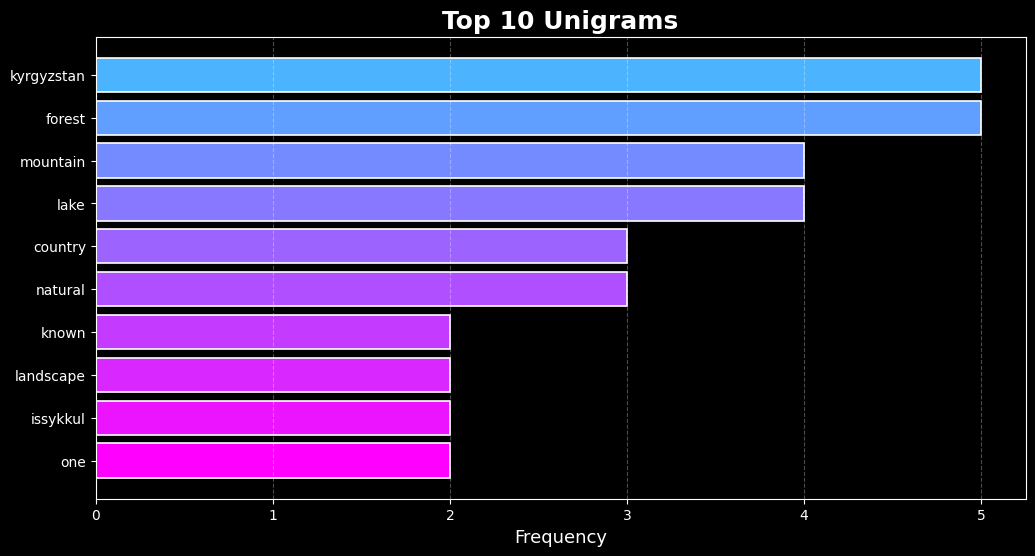

In [43]:
plt.style.use("dark_background")

uni_counts = Counter(unigrams).most_common(10)
labels = [' '.join(u[0]) for u in uni_counts]
values = [u[1] for u in uni_counts]

plt.figure(figsize=(12, 6))
colors = cm.cool(np.linspace(0.3, 1, len(values)))

plt.barh(labels, values, color=colors, edgecolor='#ffffff', linewidth=1.2)
plt.xlabel("Frequency", fontsize=13, color="white")
plt.title("Top 10 Unigrams", fontsize=18, weight="bold", color="white")
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.gca().invert_yaxis()
plt.show()

8. Visualization — Top 10 Bigrams

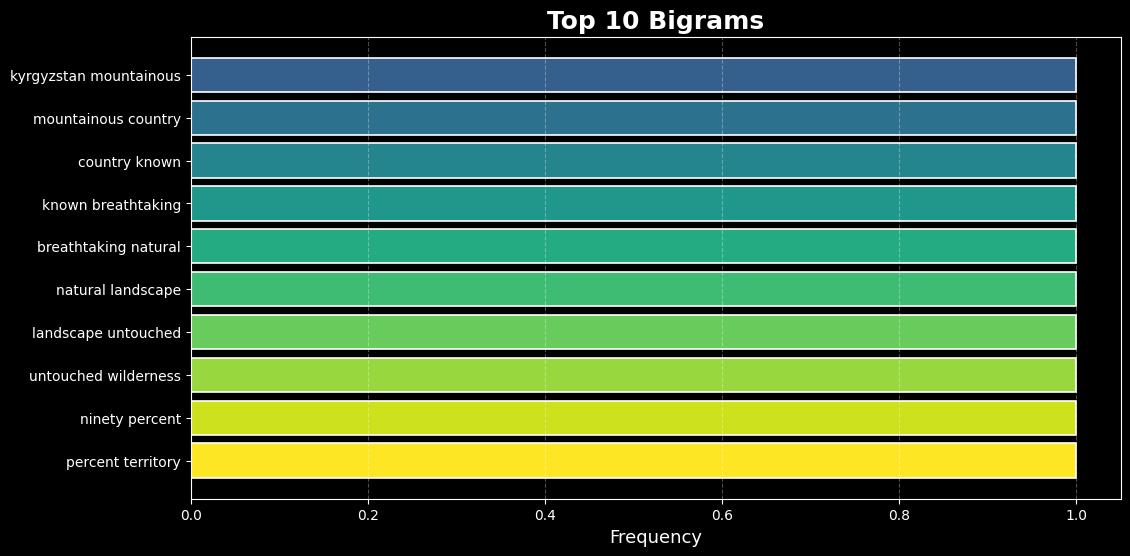

In [44]:
bi_counts = Counter(bigrams).most_common(10)
labels = [' '.join(b[0]) for b in bi_counts]
values = [b[1] for b in bi_counts]

plt.figure(figsize=(12, 6))
colors = cm.viridis(np.linspace(0.3, 1, len(values)))

plt.barh(labels, values, color=colors, edgecolor='#ffffff', linewidth=1.2)
plt.xlabel("Frequency", fontsize=13, color="white")
plt.title("Top 10 Bigrams", fontsize=18, weight="bold", color="white")
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.gca().invert_yaxis()
plt.show()

9. Visualization — Top 10 Trigrams

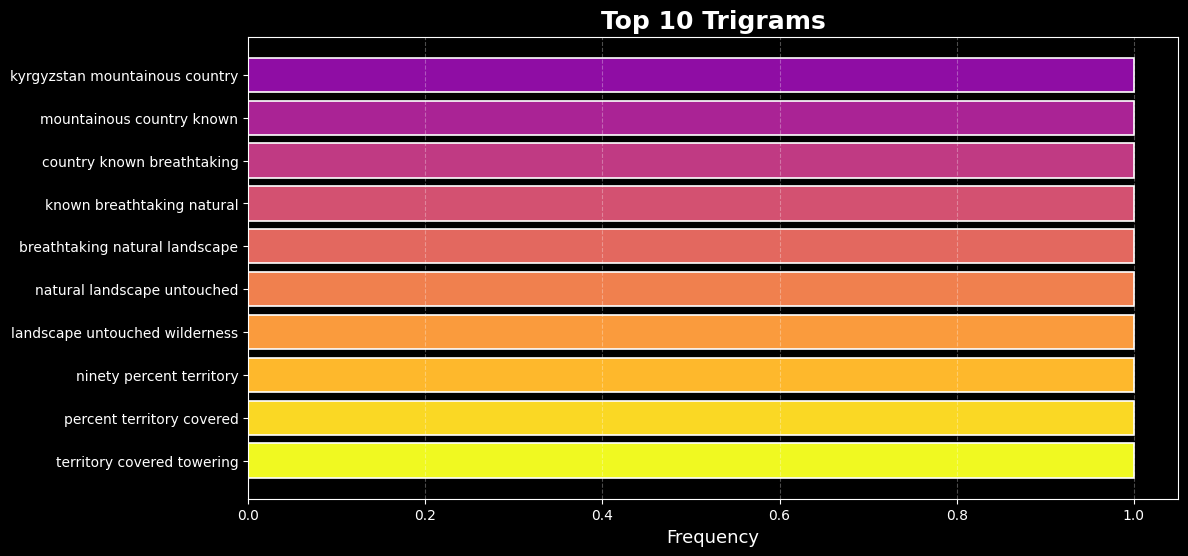

In [45]:
tri_counts = Counter(trigrams).most_common(10)
labels = [' '.join(t[0]) for t in tri_counts]
values = [t[1] for t in tri_counts]

plt.figure(figsize=(12, 6))
colors = cm.plasma(np.linspace(0.3, 1, len(values)))

plt.barh(labels, values, color=colors, edgecolor='#ffffff', linewidth=1.2)
plt.xlabel("Frequency", fontsize=13, color="white")
plt.title("Top 10 Trigrams", fontsize=18, weight="bold", color="white")
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.gca().invert_yaxis()
plt.show()